# Monitoring Point Machines in the Railway


## Overview

Tasked with analyzing data from point machines used in the railway industry. Those are crucial for switching tracks and ensuring the proper routing of trains. The point machines' performance can be monitored by analyzing the electric current used during their activation cycles. By understanding the patterns and detecting anomalies, maintenance can be optimized to prevent failures.


## Problem Statement

**Objective:** Analyzing the "electric current" data stated as (data) from the two-point machines (123A and 123 B) provided to identify any patterns or anomalies that could indicate potential issues. 

## Data Description

The dataset includes:
- **Identifier of the point machine (asset_name).**
- **Timestamp of the activation (timestamp).**
- **Direction of operation (throw_direction):** 'nr' (normal to reverse) or 'rn' (reverse to normal).
- **Electric current measurements (data).**
- **Sample rate of measurement (sample_rate).**

Data Span: The dataset includes hundreds of measurements spanning several weeks.


### Exploratory Data Analysis (EDA)

I began by loading and inspecting the dataset to understand its structure and identify any initial data quality issues such as missing values or duplicates.


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color_pal=sns.color_palette()

In [2]:
df = pd.read_parquet('signaling_case_study.parquet')
df

,asset_name,timestamp,throw_direction,data,sample_rate
0,123A,2024-01-03 10:04:33.033,nr,"[0.0, 8.420000076, 19.92000008, 19.62999916, 1...",100.0
1,123A,2024-01-03 10:14:20.553,rn,"[0.0, 0.50999999, 16.97999954, 19.92000008, 18...",100.0
2,123A,2024-01-03 10:39:36.233,nr,"[0.0, 0.319999993, 16.72999954, 19.90999985, 1...",100.0
3,123A,2024-01-03 10:44:22.013,rn,"[0.0, 14.78999996, 19.90999985, 18.64999962, 1...",100.0
4,123A,2024-01-03 11:04:47.850,nr,"[0.0, 5.710000038, 19.53000069, 19.79000092, 1...",100.0
...,...,...,...,...,...
5467,123B,2024-05-13 21:20:08.673,rn,"[0.0, 0.519999981, 17.29999924, 17.72999954, 1...",100.0
5468,123B,2024-05-13 22:21:39.987,nr,"[0.0, 14.42000008, 18.94000053, 16.29999924, 1...",100.0
5469,123B,2024-05-13 22:26:30.147,rn,"[0.0, 1.340000033, 17.70000076, 17.52000046, 1...",100.0
5470,123B,2024-05-13 23:37:55.980,nr,"[0.0, 0.150000006, 17.02000046, 17.90999985, 1...",100.0


In [3]:
df.head()

,asset_name,timestamp,throw_direction,data,sample_rate
0,123A,2024-01-03 10:04:33.033,nr,"[0.0, 8.420000076, 19.92000008, 19.62999916, 1...",100.0
1,123A,2024-01-03 10:14:20.553,rn,"[0.0, 0.50999999, 16.97999954, 19.92000008, 18...",100.0
2,123A,2024-01-03 10:39:36.233,nr,"[0.0, 0.319999993, 16.72999954, 19.90999985, 1...",100.0
3,123A,2024-01-03 10:44:22.013,rn,"[0.0, 14.78999996, 19.90999985, 18.64999962, 1...",100.0
4,123A,2024-01-03 11:04:47.850,nr,"[0.0, 5.710000038, 19.53000069, 19.79000092, 1...",100.0


In [4]:
df.tail()

,asset_name,timestamp,throw_direction,data,sample_rate
5467,123B,2024-05-13 21:20:08.673,rn,"[0.0, 0.519999981, 17.29999924, 17.72999954, 1...",100.0
5468,123B,2024-05-13 22:21:39.987,nr,"[0.0, 14.42000008, 18.94000053, 16.29999924, 1...",100.0
5469,123B,2024-05-13 22:26:30.147,rn,"[0.0, 1.340000033, 17.70000076, 17.52000046, 1...",100.0
5470,123B,2024-05-13 23:37:55.980,nr,"[0.0, 0.150000006, 17.02000046, 17.90999985, 1...",100.0
5471,123B,2024-05-13 23:45:57.160,rn,"[0.0, 5.190000057, 18.90999985, 16.56999969, 1...",100.0


In [5]:
print(df.isna().sum())

asset_name         0
timestamp          0
throw_direction    0
data               0
sample_rate        0
dtype: int64


In [6]:
df.dtypes

asset_name                 object
timestamp          datetime64[ns]
throw_direction            object
data                       object
sample_rate               float64
dtype: object

In [7]:
start_timestamp = pd.to_datetime('2024-01-03 10:04:33.033')
end_timestamp = pd.to_datetime('2024-05-13 23:45:57.160')

# Calculating the duration
duration = end_timestamp - start_timestamp
duration

Timedelta('131 days 13:41:24.127000')

I verified that the data frame contains 5472 rows and 5 columns with no missing values. Next, I need to check the data types to ensure that the integers are suitable for statistical analysis.

-Data 
-The constant sample rate of 100 in the data set is observed meaning the electric current measurements for each activation cycle of the point machines were sampled at a fixed rate of 100 samples per second (or 100 Hz). This sampling rate is likely set based on the requirements and capabilities of the measuring equipment or sensors used to capture the electric current data.

### Feature Engineering

In [8]:
df['data_mean'] = df['data'].apply(np.mean)
df['data_max'] = df['data'].apply(np.max)
df['data_variance'] = df['data'].apply(np.var)

# Verifyıng the first few rows of the new features
print(df[['asset_name', 'timestamp', 'throw_direction', 'data_mean', 'data_max', 'data_variance']].head())

  asset_name               timestamp throw_direction  data_mean   data_max  \
0       123A 2024-01-03 10:04:33.033              nr   7.886615  19.920000   
1       123A 2024-01-03 10:14:20.553              rn   7.826338  19.920000   
2       123A 2024-01-03 10:39:36.233              nr   7.870829  19.910000   
3       123A 2024-01-03 10:44:22.013              rn   7.810026  19.910000   
4       123A 2024-01-03 11:04:47.850              nr   7.866260  19.790001   

   data_variance  
0       1.737140  
1       1.823274  
2       1.863264  
3       1.661532  
4       1.756323  


In [9]:
df.loc[0,'timestamp']

Timestamp('2024-01-03 10:04:33.033000')

In [10]:
import pandas as pd

# Defining  the datetime string
date_str = "2024-01-03T10:04:33.033"

# Parsing the string to the datetime object using pd.to_datetime
datetime_obj = pd.to_datetime(date_str)

print(datetime_obj)

2024-01-03 10:04:33.033000


In [11]:
formatted_date = datetime_obj.strftime('%Y-%m-%d')
print(formatted_date)

2024-01-03


I converted the timestamp column to datetime format and set it as the index to create time series plots. This helped to observe the variations and trends in mean electric current over time for both machines.

In [12]:
data = df.dropna(subset=['data'])

In [13]:
# Verifyıng  if the missing values are handled
print(data.isna().sum())

asset_name          0
timestamp           0
throw_direction     0
data                0
sample_rate         0
data_mean          40
data_max           40
data_variance      40
dtype: int64


I extracted relevant features from the electric current measurements, including mean, max, variance, duration, and energy of the electric current for each activation.

In [14]:
df['data_mean'] = df['data'].apply(np.mean)
df['data_max'] = df['data'].apply(np.max)
df['data_variance'] = df['data'].apply(np.var)

# Verify the first few rows of the new features
print(df[['asset_name', 'timestamp', 'throw_direction', 'data_mean', 'data_max', 'data_variance']].head())

  asset_name               timestamp throw_direction  data_mean   data_max  \
0       123A 2024-01-03 10:04:33.033              nr   7.886615  19.920000   
1       123A 2024-01-03 10:14:20.553              rn   7.826338  19.920000   
2       123A 2024-01-03 10:39:36.233              nr   7.870829  19.910000   
3       123A 2024-01-03 10:44:22.013              rn   7.810026  19.910000   
4       123A 2024-01-03 11:04:47.850              nr   7.866260  19.790001   

   data_variance  
0       1.737140  
1       1.823274  
2       1.863264  
3       1.661532  
4       1.756323  


In [15]:
df['data_mean'] = df['data'].apply(np.mean)
df['data_max'] = df['data'].apply(np.max)
df['data_variance'] = df['data'].apply(np.var)

# Verifying the last few rows of the new features
print(df[['asset_name', 'timestamp', 'throw_direction', 'data_mean', 'data_max', 'data_variance']].tail())

     asset_name               timestamp throw_direction  data_mean   data_max  \
5467       123B 2024-05-13 21:20:08.673              rn   4.678125  17.730000   
5468       123B 2024-05-13 22:21:39.987              nr   4.596684  18.940001   
5469       123B 2024-05-13 22:26:30.147              rn   4.719415  17.700001   
5470       123B 2024-05-13 23:37:55.980              nr   4.602378  17.910000   
5471       123B 2024-05-13 23:45:57.160              rn   4.779579  18.910000   

      data_variance  
5467       4.171929  
5468       4.349861  
5469       4.252814  
5470       4.495213  
5471       4.070020  


It can be concluded that the data_mean and data_max values are quite similar for different activations, it would be an indicator the point machines have consistent performance in terms of electric current usage. This consistency can indicate normal and stable operation of the point machines. 

I implemented basic outlier detection techniques using Z-scores to identify abnormal activations based on the extracted features.

In [16]:
from scipy.stats import zscore

# Calculate z-scores for variance, ensuring no NaN values remain
df['var_current_zscore'] = zscore(df['data_variance'].dropna())

# Handle NaN values in z-scores, if any, by filling them with zero (or another appropriate value)
df['var_current_zscore'] = df['var_current_zscore'].fillna(0)

# Verify the z-scores
print(df[['data_variance', 'var_current_zscore']].head())

   data_variance  var_current_zscore
0       1.737140           -1.665721
1       1.823274           -1.587132
2       1.863264           -1.550645
3       1.661532           -1.734707
4       1.756323           -1.648219


-The var_current_zscore column indicates the z-score of the variance of electric current for each activation. Z-scores are a way of standardizing data points in terms of their distance from the mean, measured in standard deviations.

-The values  are negative, indicating that all these data points (variances) are below the mean-variance of the entire dataset.

-The magnitude of these z-scores (ranging from -1.734707 to -1.550645) suggests that these variances are between approximately 1.55 to 1.73 standard deviations below the mean variance.

-Since all the given z-scores are within the range of -3 to 3, these data points would not be considered outliers. They indicate normal variations in the current measurements for the point machines.

### Distribution with a histograms

C:\Users\MELDA\AppData\Local\Temp\ipykernel_22088\764857140.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['data_mean'], hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor':'black'})
C:\Users\MELDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


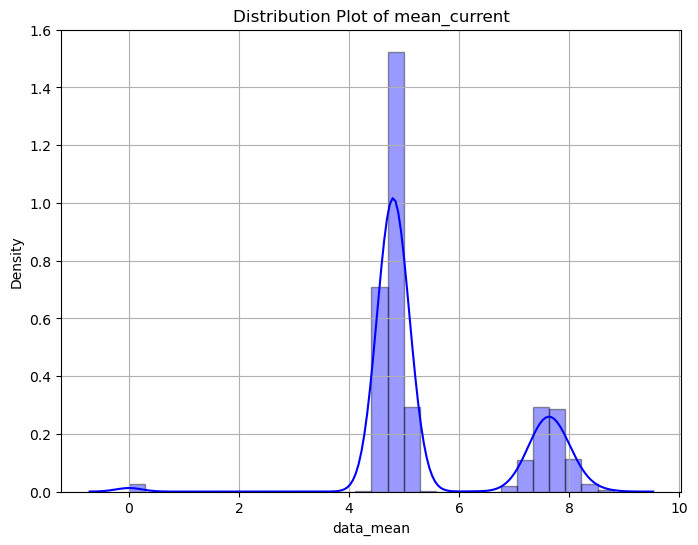

In [17]:
plt.figure(figsize=(8, 6))
sns.distplot(df['data_mean'], hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor':'black'})
plt.xlabel('data_mean')
plt.ylabel('Density')
plt.title('Distribution Plot of mean_current')
plt.grid(True)
plt.show()

The above plot shows the frequency distribution of the mean electric current values. The x-axis represents the mean electric current values, while the y-axis represents the density.

-From the distribution we have is right-skewed data this means the mean is greater than the median.

-The median will be less than the mean because it is not affected by the extremely high values as much as the mean.

-This right skewness means that there are  some activation cycles with significantly higher mean current values compared to the rest.

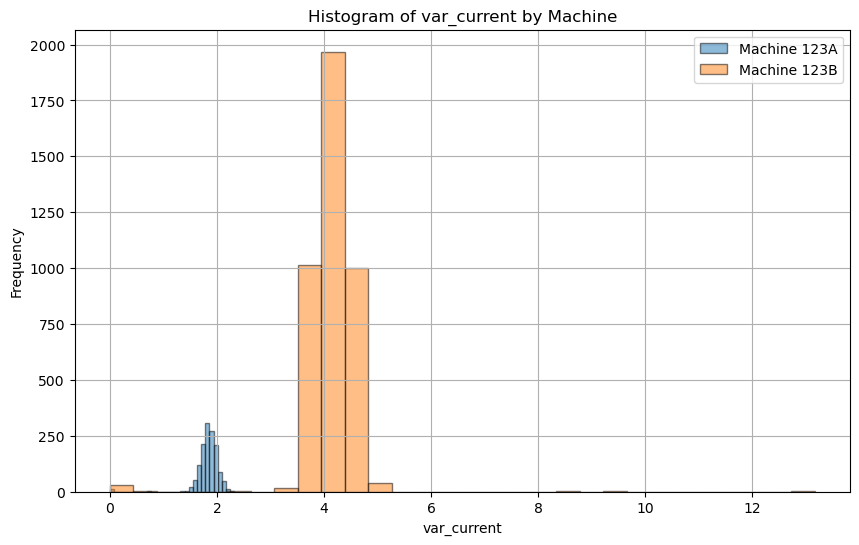

In [18]:
machine_123A = df[df['asset_name'] == '123A']
machine_123B = df[df['asset_name'] == '123B']

# Plot histograms for var_current
plt.figure(figsize=(10, 6))
plt.hist(machine_123A['data_variance'], bins=30, alpha=0.5, label='Machine 123A', edgecolor='black')
plt.hist(machine_123B['data_variance'], bins=30, alpha=0.5, label='Machine 123B', edgecolor='black')
plt.xlabel('var_current')
plt.ylabel('Frequency')
plt.title('Histogram of var_current by Machine')
plt.legend()
plt.grid(True)
plt.show()

-Above this broader distribution (0-5) suggests that Machine 123B experiences more variability in the variance of electric current during its activation cycles.

-Machine 123A operates with relatively consistent variance in its electric current measurements, possibly indicating stable performance or consistent operating conditions.

-The wider spread may indicate fluctuations in operating conditions, varying loads, or potentially different maintenance or environmental factors affecting performance, that require closer monitoring.

C:\Users\MELDA\AppData\Local\Temp\ipykernel_22088\396587203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_123A['data_mean'], bins=30, hist=True, kde=True, label='Machine 123A', hist_kws={'edgecolor':'black'})
C:\Users\MELDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MELDA\AppData\Local\Temp\ipykernel_22088\396587203.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

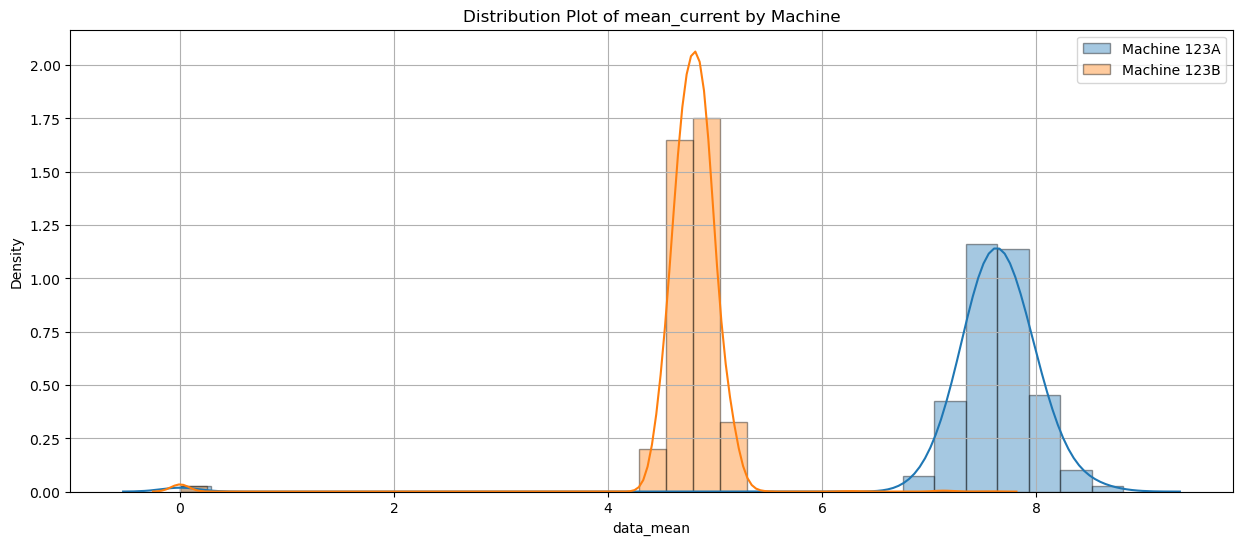

In [19]:
plt.figure(figsize=(15, 6))
sns.distplot(machine_123A['data_mean'], bins=30, hist=True, kde=True, label='Machine 123A', hist_kws={'edgecolor':'black'})
sns.distplot(machine_123B['data_mean'], bins=30, hist=True, kde=True, label='Machine 123B', hist_kws={'edgecolor':'black'})
plt.xlabel('data_mean')
plt.ylabel('Density')
plt.title('Distribution Plot of mean_current by Machine')
plt.legend()
plt.grid(True)
plt.show()

-Both machines display right skewness, indicating that higher mean electric current values are more frequent than lower values.

-Machine 123B shows a broader distribution with a higher peak density in the range of 4 to 6, suggesting variability and potentially diverse operational conditions.

Machine 123A  tends to operate with slightly higher mean electric current values concentrated in the range of 6 to 8, possibly indicating consistent performance within a moderate range.

-The distribution differences highlight potential differences in operational efficiency or environmental conditions affecting electric current performance.

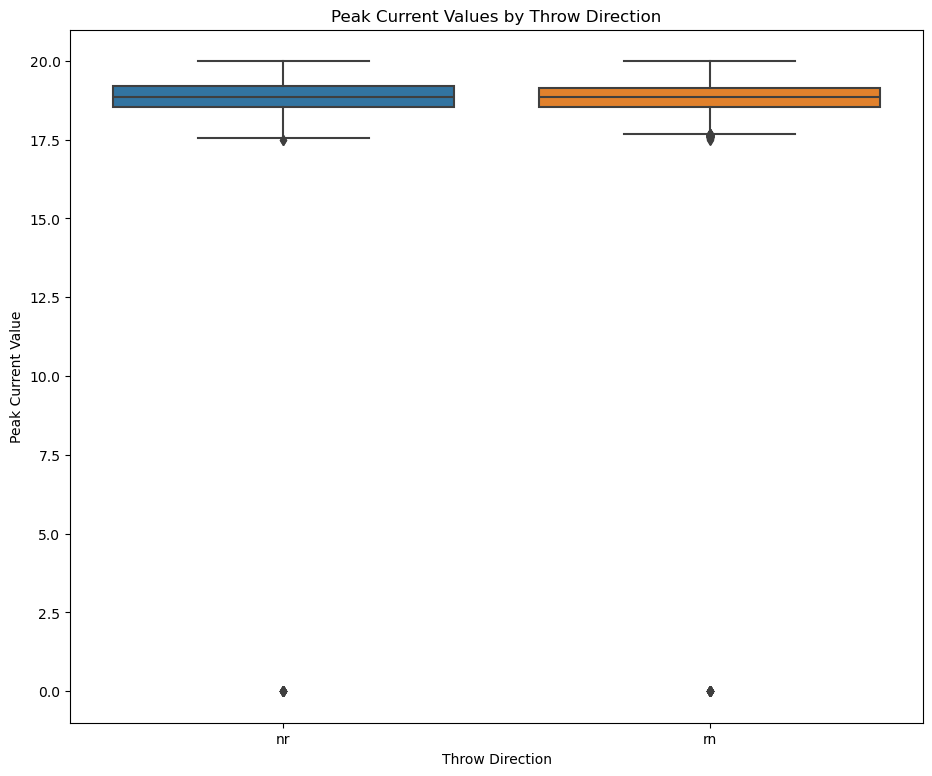

In [24]:
plt.figure(figsize=(11, 9))
sns.boxplot(x='throw_direction', y='data_max', data=df)
plt.title('Peak Current Values by Throw Direction')
plt.xlabel('Throw Direction')
plt.ylabel('Peak Current Value')
plt.show()

This suggests that the peak current values are generally comparable between these two directions. There is no strong evidence from this plot alone to suggest a significant difference in peak current values based on throw direction.

### Pattern analysis with time series 

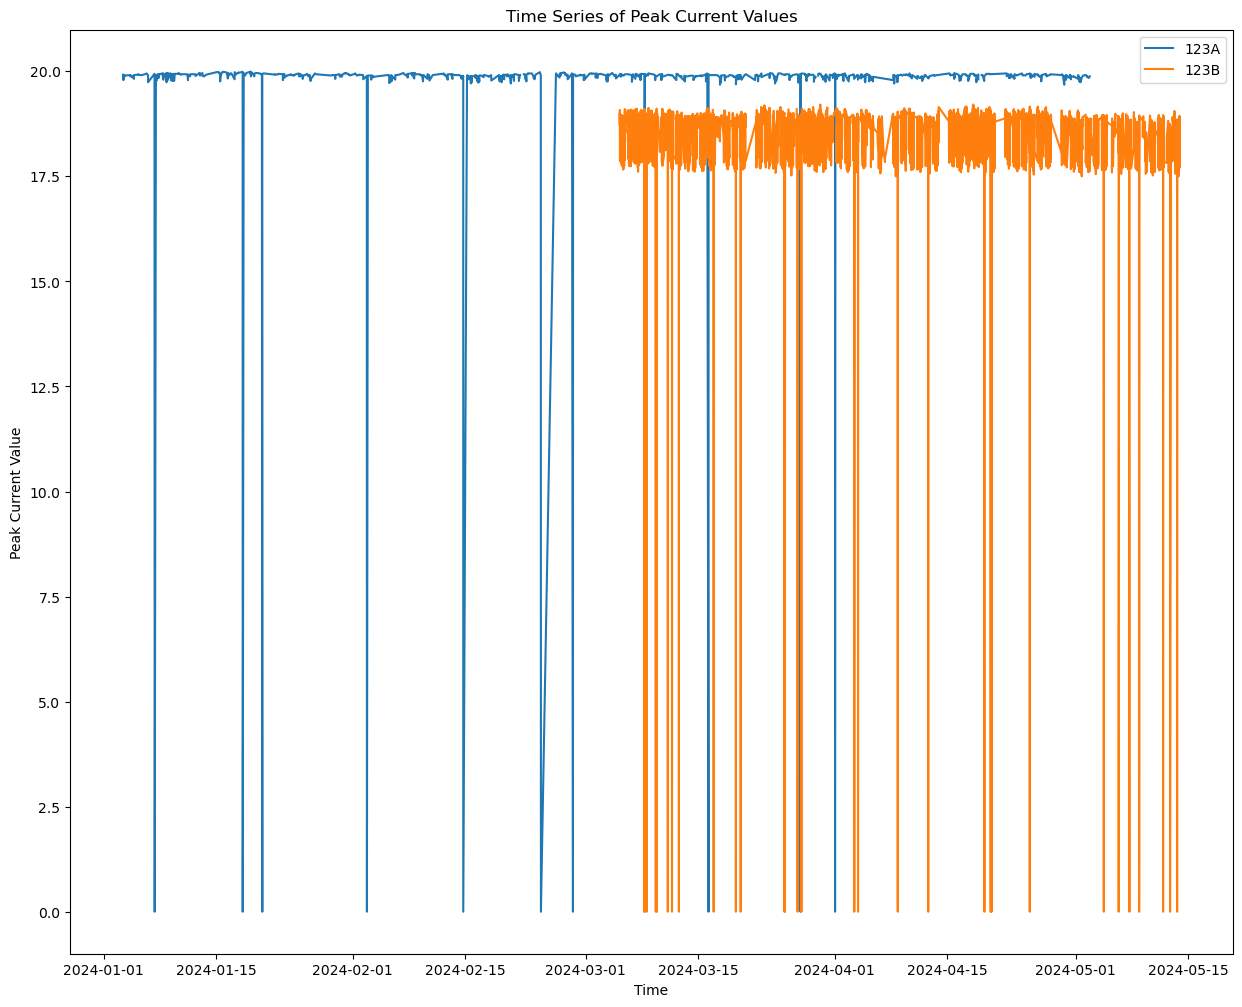

In [21]:
plt.figure(figsize=(15,12))
for asset in df['asset_name'].unique():
    asset_data = df[df['asset_name'] == asset]
    plt.plot(asset_data['timestamp'], asset_data['data_max'], label=asset)
plt.title('Time Series of Peak Current Values')
plt.xlabel('Time')
plt.ylabel('Peak Current Value')
plt.legend()
plt.show()

-From the graph machine  123A shows consistently higher peak current values compared to machine 123B, this could indicate that machine 123A is experiencing higher load or stress during operations.

-Differences in the starting times (machine 123A from January, machine 123B from March) is observed.

###  The Correlation  beween variables

               data_mean  data_max  data_variance  timestamp
data_mean       1.000000  0.632027      -0.770158  -0.537571
data_max        0.632027  1.000000      -0.056241  -0.168630
data_variance  -0.770158 -0.056241       1.000000   0.538346
timestamp      -0.537571 -0.168630       0.538346   1.000000


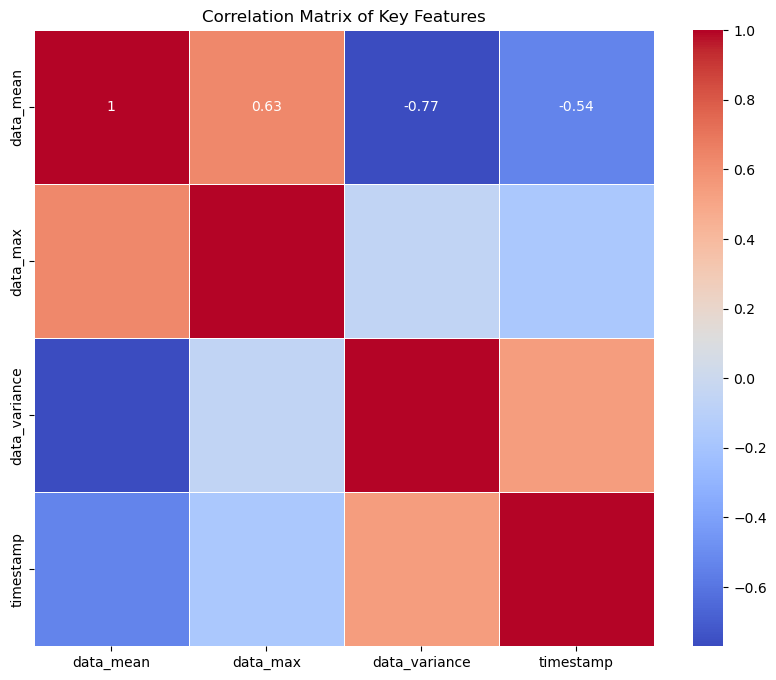

In [22]:
correlation_matrix = data[['data_mean', 'data_max', 'data_variance','timestamp']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

The strongest correlations are between data_mean and data_variance (-0.770), indicating that as the mean current increases, the variability decreases.


data_mean and data_max (0.632): Mean current increases with peak current.
data_variance and timestamp (0.538): Variability in current readings increases over time.
data_mean and timestamp (-0.538): Mean current decreases over time.

The correlation between data_max and other variables, except data_mean, is weak, indicating that peak current values are relatively independent of variance and time.

# Findings

131 days of analysis :

The analysis of electric current data from two point machines, identified as 123A and 123B, revealed that Machine 123A consistently exhibits higher peak current values compared to Machine 123B, which suggests higher operational stress or load. 

- Machine 123A's data spans from January 2024, while Machine 123B's data starts from March 2024. Correlation analysis showed a positive relationship between mean and peak current values, and a negative correlation between mean current and variance, indicating that as the mean current increases, the variability tends to decrease. 

- Distribution plots revealed that both machines exhibit right-skewness in current values, with Machine 123A having a higher density of mean current values around 6-8 A, while Machine 123B's density peaks around 4-6 A. The histogram of variance indicated that Machine 123A has more widely spread variance, suggesting greater operational variability, whereas Machine 123B has more concentrated variance, indicating more stable operations. 

- Anomalies were detected using Z-scores based on mean and standard deviation thresholds, highlighting potential issues that require maintenance. The findings suggest the need for closer monitoring of Machine 123A due to its higher peak currents and operational variability, while Machine 123B, despite showing stable performance, should continue to be monitored for any emerging anomalies.

- Environmental factors, such as temperature fluctuations, humidity, and debris on tracks, could also be influencing the higher operational variability observed in Machine 123A. Therefore, it is crucial to implement a more rigorous monitoring and maintenance schedule for Machine 123A to address these issues and ensure reliable performance.